In [35]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path
import os

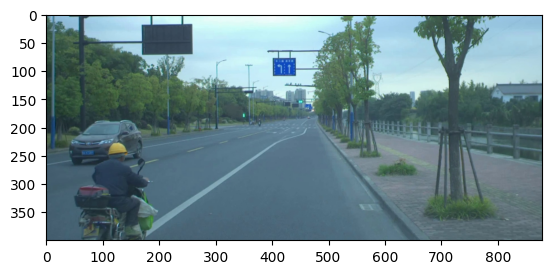

In [36]:
frames = []

for child in Path('../data/stereo_video/').iterdir():
    if child.is_file():
        frames.append(cv2.cvtColor(cv2.imread('../data/stereo_video/' + child.name), cv2.COLOR_BGR2RGB))
plt.imshow(frames[0])

min :  29
max :  250
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


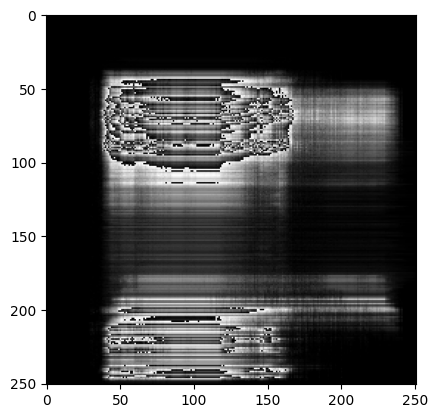

normalized GLCM


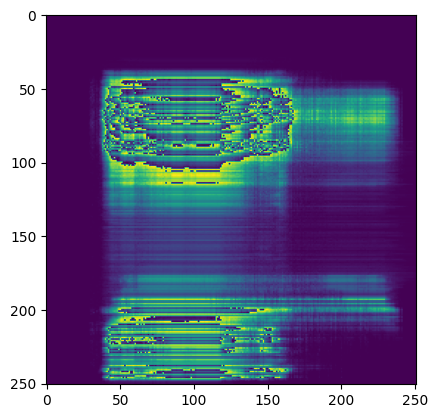

In [37]:
def glcm(image, d):
  print('min : ', np.min(image))
  print('max : ', np.max(image))
   
  glcm_mat = np.zeros((np.max(image) + 1, np.max(image) + 1), dtype=np.uint8)

  for x in range(image.shape[1]):
      for y in range(image.shape[0]):
        if x < image.shape[1] and y < image.shape[0] and x * d[0] + y * d[1] < image.shape[1] and x * d[0] + y * d[1] < image.shape[0]:
              i = image[x, y]
              j = image[x * d[0] + y * d[1]]
              glcm_mat[i, j] = glcm_mat[i, j] + 1

  return glcm_mat

glcm_mat = glcm(cv2.cvtColor(frames[0], cv2.COLOR_RGB2GRAY), [1, 1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

# Normalize the GLCM
glcm_mat = glcm_mat / np.max(glcm_mat)
plt.show()
print('normalized GLCM')
plt.imshow(glcm_mat * 255)

min :  5
max :  255
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 1 1]]


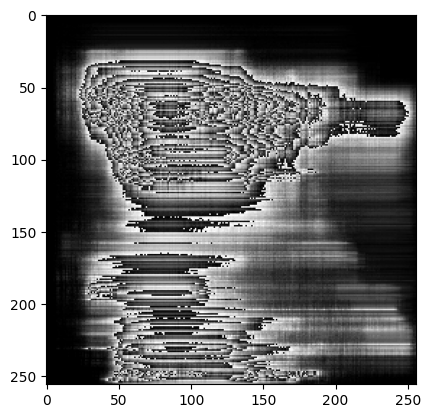

In [38]:
glcm_mat = glcm(frames[1], [1, 1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

min :  14
max :  255
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


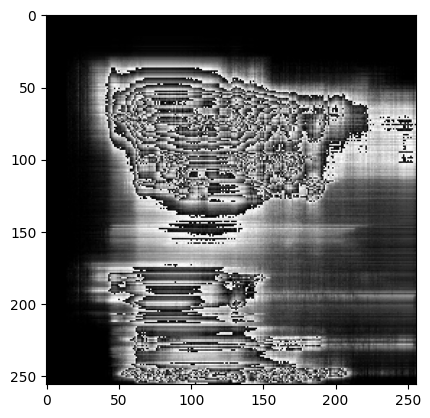

In [39]:
glcm_mat = glcm(frames[30], [1, 1])
print(glcm_mat)
plt.imshow(glcm_mat, cmap='gray')

GLCM of the segmented images

segmentedimage_1_2018-10-31-06-55-01_2018-10-31-07-00-50-232.jpg


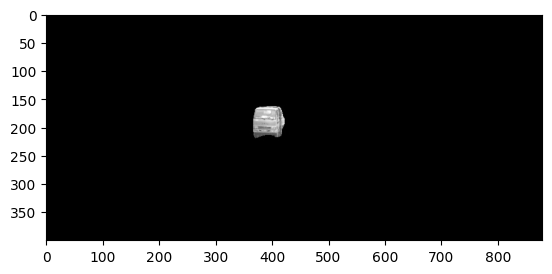

segmentedimage_2_2018-10-31-06-55-01_2018-10-31-07-00-50-730.jpg


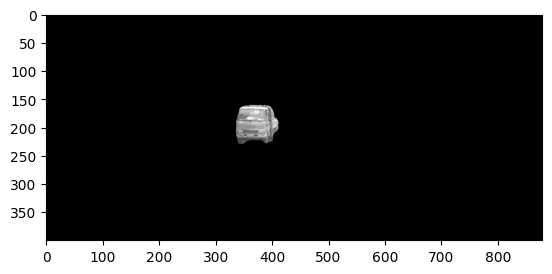

segmentedimage_3_2018-10-31-06-55-01_2018-10-31-07-00-51-229.jpg


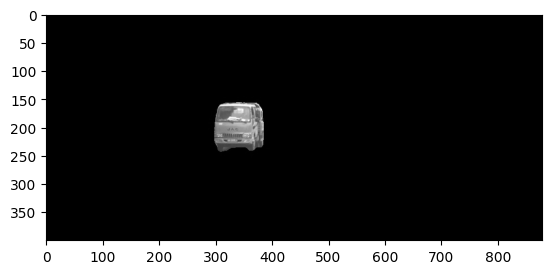

segmentedimage_4_2018-10-31-06-55-01_2018-10-31-07-00-51-529.jpg


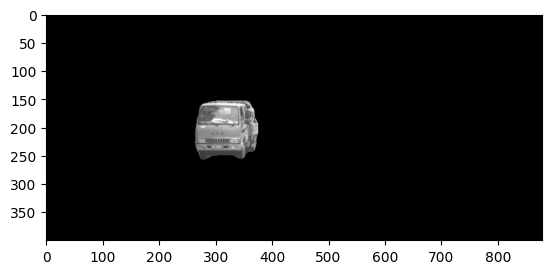

segmentedimage_5_2018-10-31-06-55-01_2018-10-31-07-00-51-729.jpg


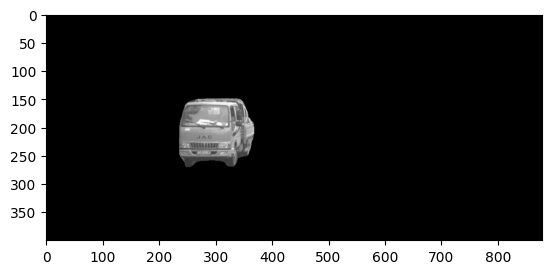

In [40]:
images = []

for child in Path('../data/segmented_images/').iterdir():
    if child.is_file():
        images.append(cv2.imread('../data/segmented_images/' + child.name))
        images[-1] = cv2.cvtColor(images[-1], cv2.COLOR_RGB2GRAY)
    
        print(child.name)
        plt.imshow(images[-1], cmap='gray')
        plt.show()

d = [1, 1]
min :  0
max :  252
original image


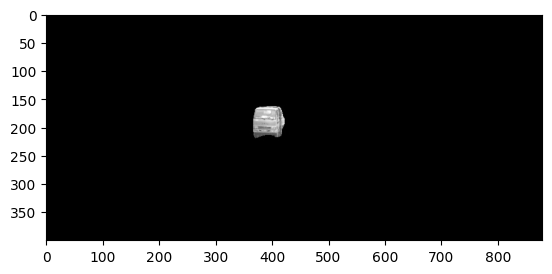

normalized GLCM


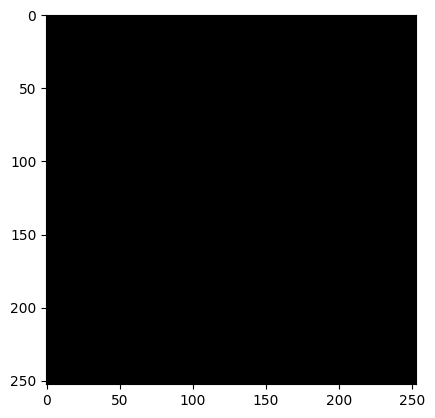

d = [1, 0]
min :  0
max :  252
original image


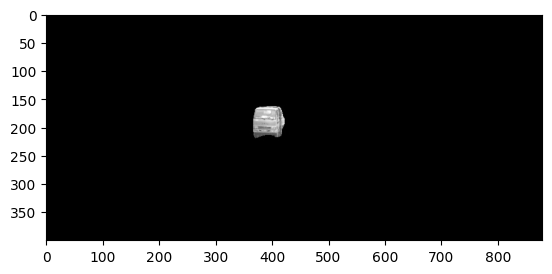

normalized GLCM


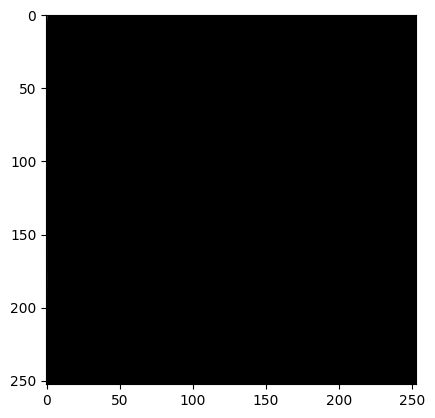

d = [0, 1]
min :  0
max :  252
original image


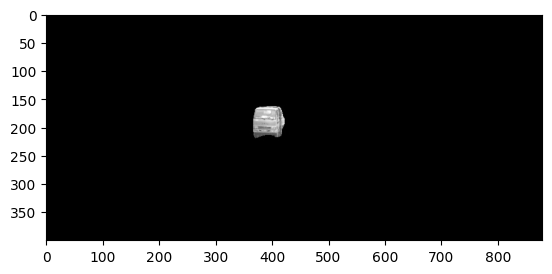

normalized GLCM


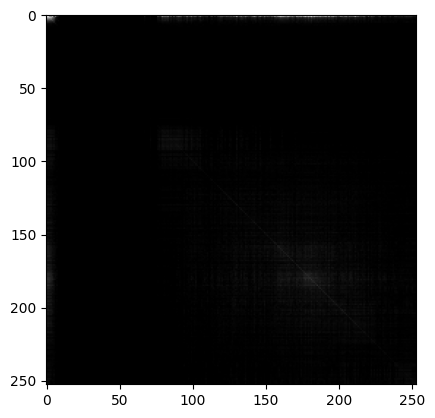

d = [1, 1]
min :  0
max :  252
original image


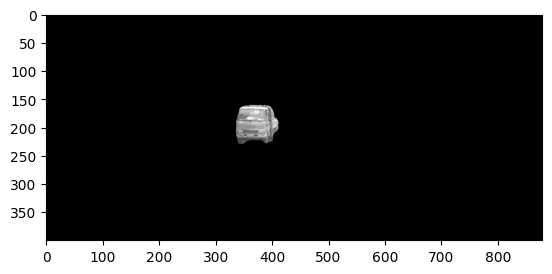

normalized GLCM


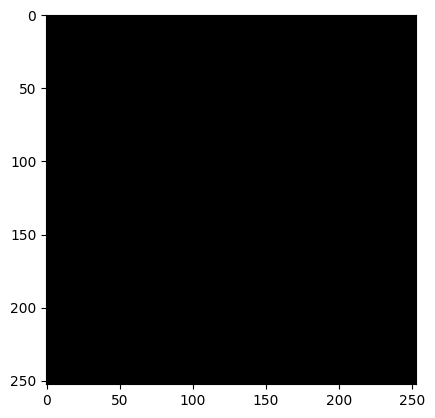

d = [1, 0]
min :  0
max :  252
original image


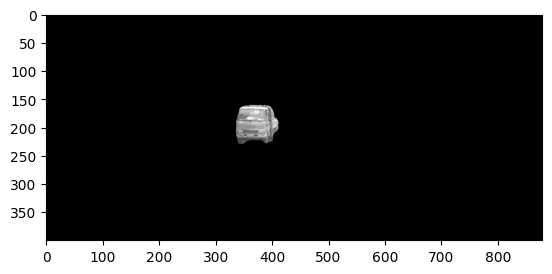

normalized GLCM


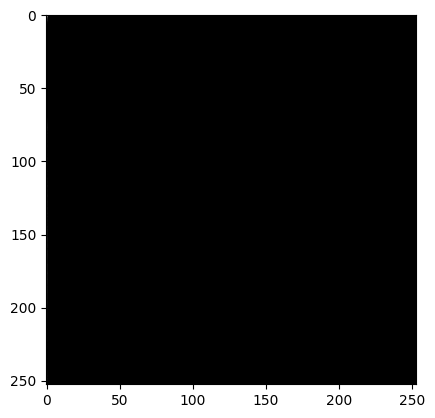

d = [0, 1]
min :  0
max :  252
original image


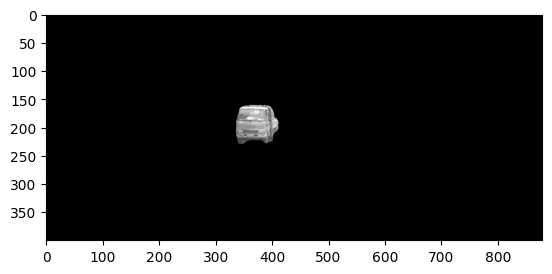

normalized GLCM


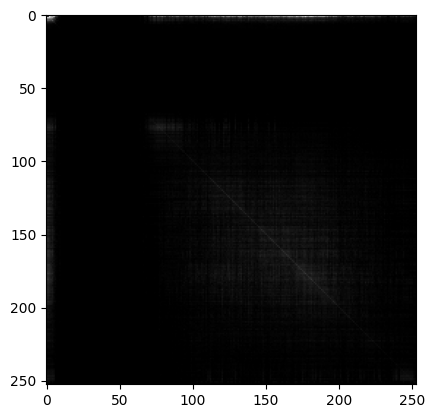

d = [1, 1]
min :  0
max :  254
original image


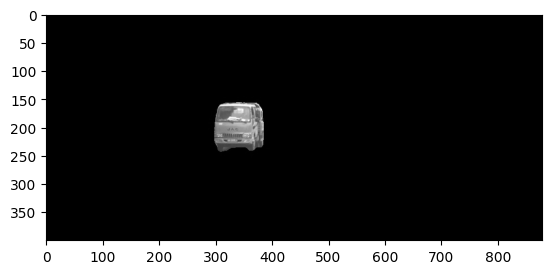

normalized GLCM


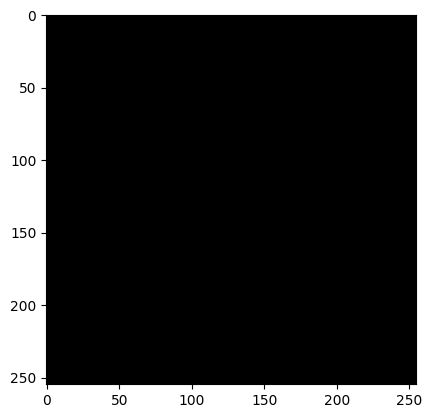

d = [1, 0]
min :  0
max :  254
original image


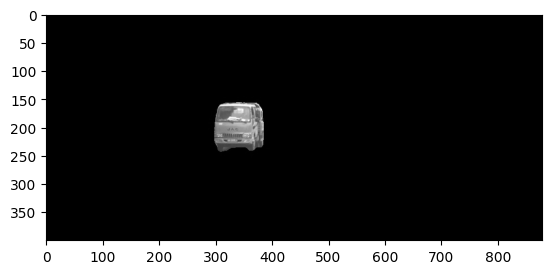

normalized GLCM


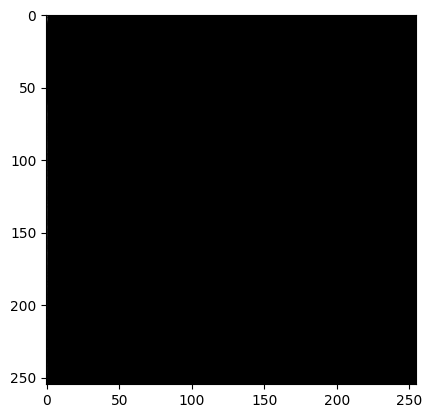

d = [0, 1]
min :  0
max :  254
original image


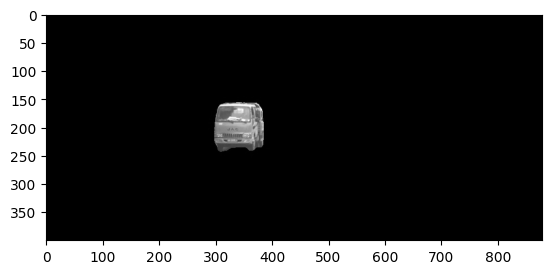

normalized GLCM


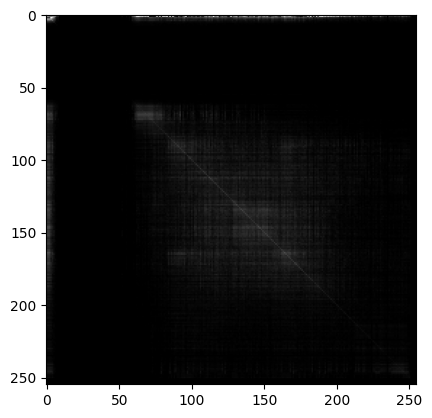

d = [1, 1]
min :  0
max :  251
original image


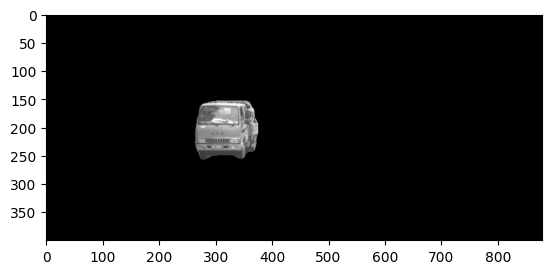

normalized GLCM


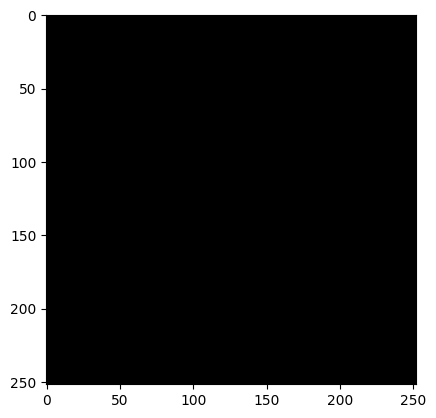

d = [1, 0]
min :  0
max :  251
original image


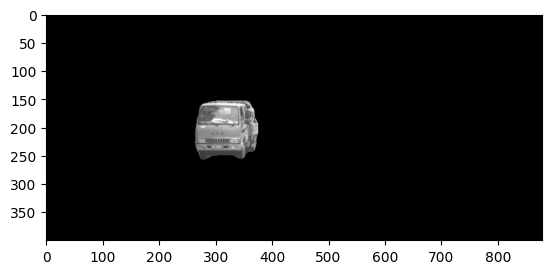

normalized GLCM


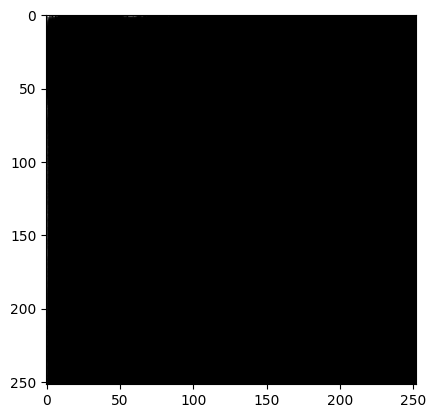

d = [0, 1]
min :  0
max :  251
original image


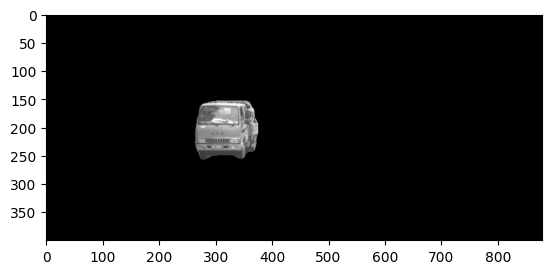

normalized GLCM


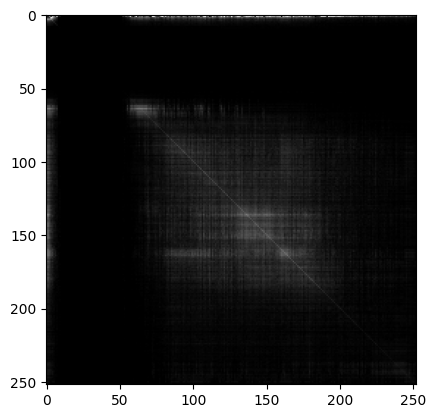

d = [1, 1]
min :  0
max :  252
original image


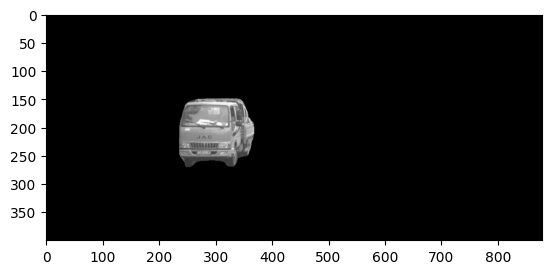

normalized GLCM


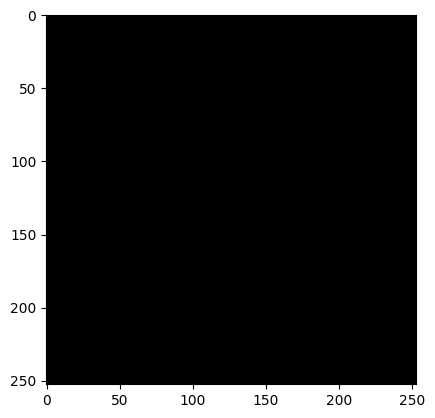

d = [1, 0]
min :  0
max :  252
original image


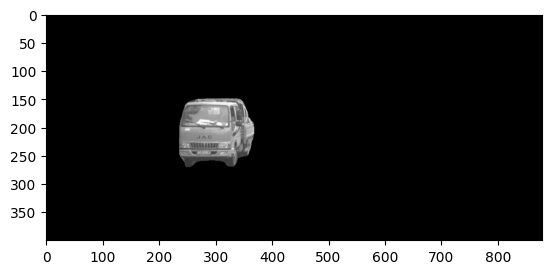

normalized GLCM


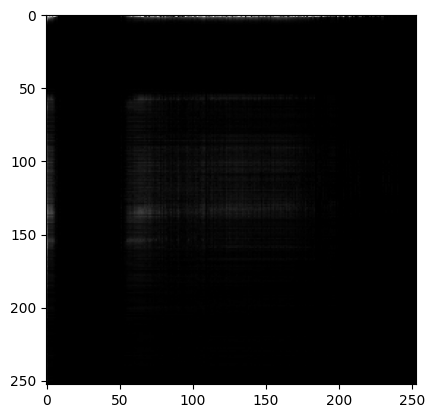

d = [0, 1]
min :  0
max :  252
original image


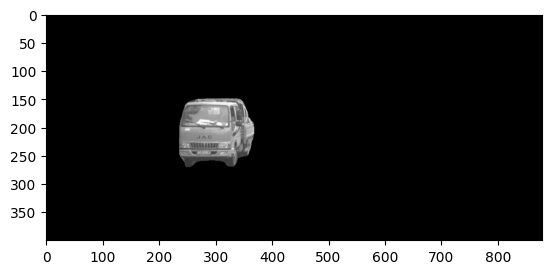

normalized GLCM


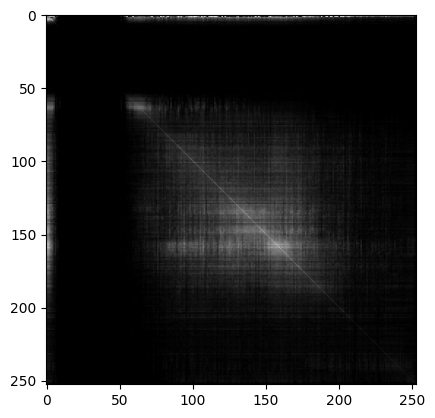

In [41]:
ds = [[1, 1], [1, 0], [0, 1]]

for image in images:
    for d in ds:
        print("d =", d)
        glcm_mat = glcm(image, d)
        print('original image')
        plt.imshow(image, cmap='gray')
        plt.show()
        #print('glcm matrix')
        #plt.imshow(glcm_mat, cmap='gray')

        # Normalize the GLCM
        glcm_mat = glcm_mat / np.max(glcm_mat)
        plt.show()
        print('normalized GLCM')
        plt.imshow(glcm_mat * 255, cmap='gray')
        plt.show()
